In [1]:
# Importando as Bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Função de Exibição
def imshow(title = "Image", image = None, size = 9):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Detecção de Borda - Canny**

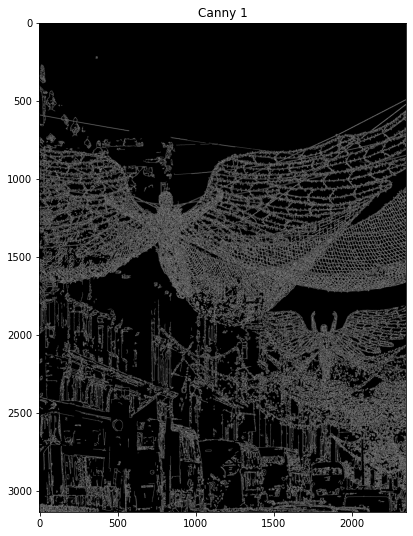

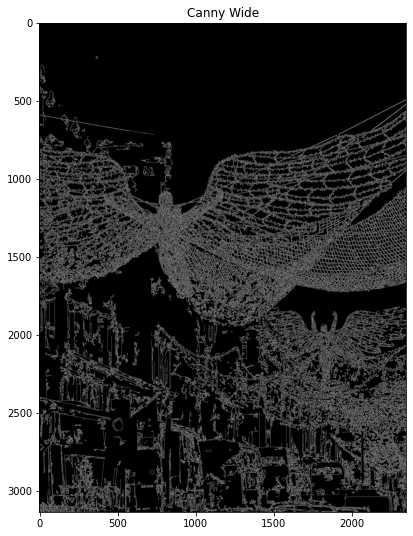

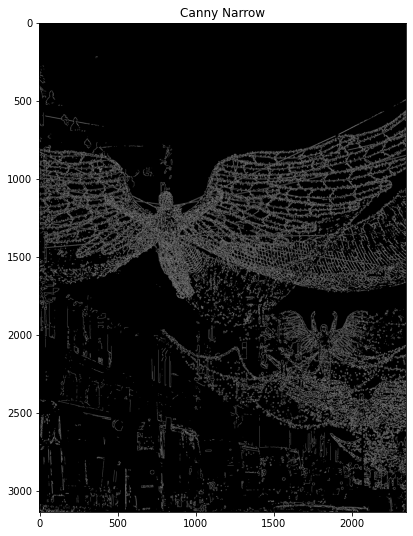

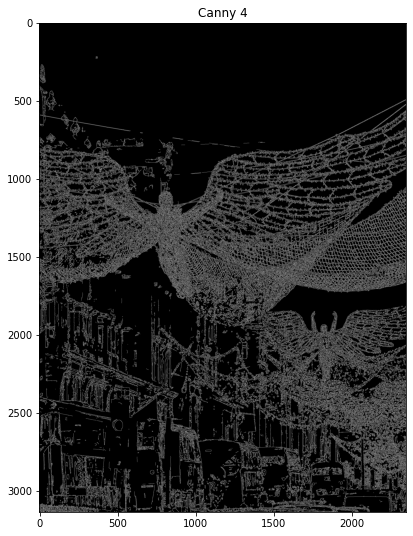

In [3]:
# Carregando Imagem
image = cv2.imread('/content/London.jpg',0)

# Detecção de Borda Canny usa valores de gradiente como limites
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# Limites de borda larga - esperam muitas bordas
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# Limites estreito, espere menos bordas
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

# Valores de gradiente abaixo de 60 - Não Bordas
# Valores de gradiente acima de 120 - Bordas
canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

## **Auto Canny**

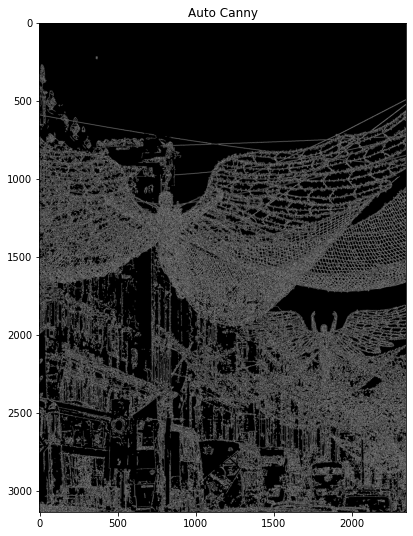

In [4]:
def autoCanny(image):
  # Encontra os limites ideais com base na intensidade mediana de pixels da imagem
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image) 
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("Auto Canny", auto_canny)

## **Contornos**

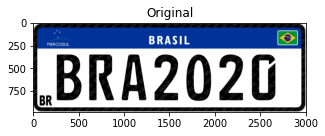

In [5]:
# Carregando e Exibindo Imagem
image = cv2.imread('/content/Placa.jpg')
imshow('Original', image, size = 15)

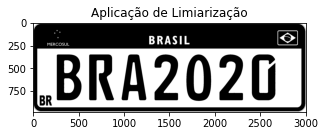

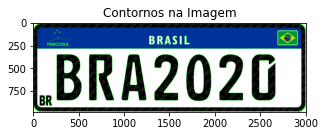

Número de contornos encontrados = 92


In [6]:
# Convertendo em Escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Aplicação de Limiarização', th2, size = 15)

#  Encontrando Contornos
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Desenhando os contornos, isso substitui a imagem de entrada
# Foi '-1' no terceiro parâmetro para desenhar todos os contornos
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contornos na Imagem', image, size = 15)

print("Número de contornos encontrados = " + str(len(contours)))

In [7]:
contours[0]

array([[[  0, 891]],

       [[  0, 892]],

       [[  0, 893]],

       ...,

       [[  0, 894]],

       [[  0, 893]],

       [[  0, 892]]], dtype=int32)

## **Contornos - Sem Limiarização**

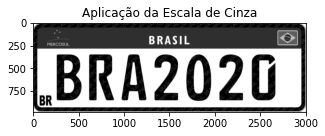

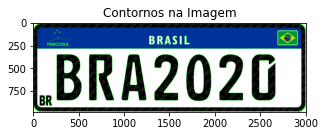

Número de contornos encontrados = 19752


In [8]:
# Convertendo em Escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('Aplicação da Escala de Cinza', gray, size = 15)

# Encontrando Contornos
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Desenhando os contornos, isso substitui a imagem de entrada
# Foi '-1' no terceiro parâmetro para desenhar todos os contornos
imshow('Contornos na Imagem', image, size = 15)

print("Número de contornos encontrados = " + str(len(contours)))

## **Aplicação da Detecção de Bordas**

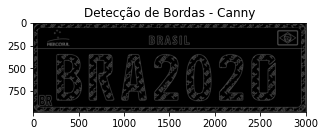

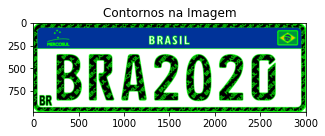

Número de contornos encontrados = 1373


In [9]:
# Convertendo em Escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detecção de Bordas
edged = cv2.Canny(gray, 30, 200)
imshow('Detecção de Bordas - Canny', edged, size = 15)

# Encontrando Contornos
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Desenhando os contornos, isso substitui a imagem de entrada
# Foi '-1' no terceiro parâmetro para desenhar todos os contornos
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contornos na Imagem', image, size = 15)

print("Número de contornos encontrados = " + str(len(contours)))

## **Modos de Recuperação**

In [10]:
# Carregando e Exibindo Imagem
imagem = cv2.imread('/content/Placa.jpg')

In [ ]:
# Carregando e Exibindo Imagem
imagem1 = cv2.imread('/content/Placa.jpg')

# Convertendo em Escala de Cinza
gray = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Modo de Recuperação - RETR_LIST
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Desenhando os contornos, isso substitui a imagem de entrada
cv2.drawContours(imagem1, contours, -1, (0,255,0), thickness = 2)
# ******************* - RETR_LIST

In [ ]:
# Carregando e Exibindo Imagem
imagem2 = cv2.imread('/content/Placa.jpg')

# Convertendo em Escala de Cinza
gray = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Modo de Recuperação - RETR_EXTERNAL
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Desenhando os contornos, isso substitui a imagem de entrada
cv2.drawContours(imagem2, contours, -1, (0,255,0), thickness = 2)
# ******************* - RETR_EXTERNAL

In [ ]:
# Carregando e Exibindo Imagem
imagem3 = cv2.imread('/content/Placa.jpg')

# Convertendo em Escala de Cinza
gray = cv2.cvtColor(imagem3, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Modo de Recuperação - RETR_CCOMP
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
# Desenhando os contornos, isso substitui a imagem de entrada
cv2.drawContours(imagem3, contours, -1, (0,255,0), thickness = 2)
# ******************* - RETR_CCOMP

In [ ]:
# Carregando e Exibindo Imagem
imagem4 = cv2.imread('/content/Placa.jpg')

# Convertendo em Escala de Cinza
gray = cv2.cvtColor(imagem4, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Modo de Recuperação - RETR_TREE
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Desenhando os contornos, isso substitui a imagem de entrada
cv2.drawContours(imagem4, contours, -1, (0,255,0), thickness = 2)
# ******************* - RETR_TREE

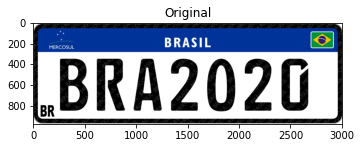

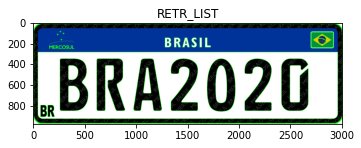

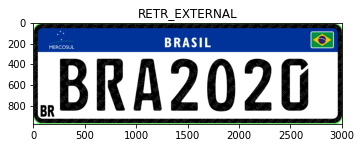

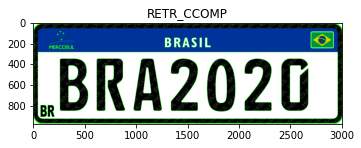

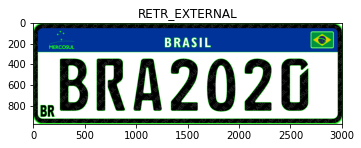

In [15]:
imshow('Original', imagem, size = 17)
imshow('RETR_LIST', imagem1, size = 17)
imshow('RETR_EXTERNAL', imagem2, size = 17)
imshow('RETR_CCOMP', imagem3, size = 17)
imshow('RETR_EXTERNAL', imagem4, size = 17)

## **Modos de Contorno**

In [16]:
# Carregando e Exibindo Imagem
image = cv2.imread('/content/Placa.jpg')

In [ ]:
# Carregando e Exibindo Imagem
image1 = cv2.imread('/content/Placa.jpg')

# Convertendo em Escala de Cinza
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Modos de Contorno - CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Desenhando os contornos, isso substitui a imagem de entrada
cv2.drawContours(image1, contours, -1, (0,255,0), thickness = 2)
# ***************** - CHAIN_APPROX_NONE

In [ ]:
# Carregando e Exibindo Imagem
image2 = cv2.imread('/content/Placa.jpg')

# Convertendo em Escala de Cinza
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Modos de Contorno - CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Desenhando os contornos, isso substitui a imagem de entrada
cv2.drawContours(image2, contours, -1, (0,255,0), thickness = 2)
# ***************** - CHAIN_APPROX_SIMPLE

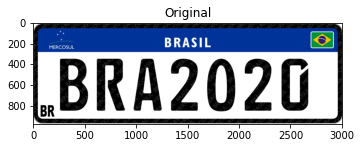

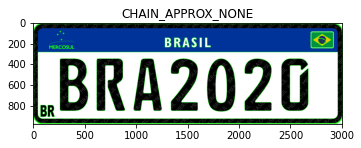

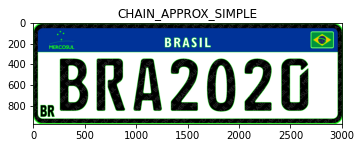

In [19]:
imshow('Original', image, size = 17)
imshow('CHAIN_APPROX_NONE', image1, size = 17)
imshow('CHAIN_APPROX_SIMPLE', image2, size = 17)